<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-utilizado" data-toc-modified-id="Dataset-utilizado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset utilizado</a></span><ul class="toc-item"><li><span><a href="#Número-de-amostras-e-colunas" data-toc-modified-id="Número-de-amostras-e-colunas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Número de amostras e colunas</a></span></li><li><span><a href="#Vitórias-por-time" data-toc-modified-id="Vitórias-por-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vitórias por time</a></span></li><li><span><a href="#Filtrando-colunas-de-atributo-principal" data-toc-modified-id="Filtrando-colunas-de-atributo-principal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtrando colunas de atributo principal</a></span></li></ul></li><li><span><a href="#Separar-dados-para-treinamento" data-toc-modified-id="Separar-dados-para-treinamento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separar dados para treinamento</a></span></li><li><span><a href="#Treinar-modelos-de-classificação" data-toc-modified-id="Treinar-modelos-de-classificação-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treinar modelos de classificação</a></span><ul class="toc-item"><li><span><a href="#Declarando-modelos" data-toc-modified-id="Declarando-modelos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Declarando modelos</a></span></li><li><span><a href="#Treinamento" data-toc-modified-id="Treinamento-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Treinamento</a></span></li></ul></li><li><span><a href="#Mostrando-e-salvando-Resultados" data-toc-modified-id="Mostrando-e-salvando-Resultados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mostrando e salvando Resultados</a></span><ul class="toc-item"><li><span><a href="#Salvando-resultados-dos-modelos" data-toc-modified-id="Salvando-resultados-dos-modelos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Salvando resultados dos modelos</a></span></li><li><span><a href="#Gráfico-de-comparação" data-toc-modified-id="Gráfico-de-comparação-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gráfico de comparação</a></span></li></ul></li><li><span><a href="#Conclusão-e-próximos-passos" data-toc-modified-id="Conclusão-e-próximos-passos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusão e próximos passos</a></span></li></ul></div>

---
# Experimento 6: Modelo com status por time 

**Objetivo do experimento:** Treinar diferentes modelos com status sumarizados por time.


**Formato do experimento:** Serão utilizadas todas as variáveis do arquivo ``2_TRA_2021-05-08_working_data.csv``. Dados já estão filtrados por game_mode e lobby_type.

1. Os dados serão divididos em 5 conjuntos, onde será aplicada uma validação cruzada;
2. O passo 1 será repetido 3 vezes com os dados sendo separados aleatoriamente em cada uma das vezes;
3. Será calculada a acurácia média destes 15 conjuntos de teste;

**Os seguintes modelos serão usados:**

- Regressão Logística
- KNN
- Random Forest
- Rede Neural
- XGBoost
- Naive Bayes

**Métrica de avaliação:** Acurácia média dos dados de testes nos 15 conjuntos de dados: 3 validações cruzadas, onde cada validação possui 1 conjunto de teste.

---
**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

**Loading data**

In [13]:
raw_data_path = '../data/raw_data/'
data_path = '../data/working_data/'


file = '3_TRA_2021-07-25_working_data.csv'
df_original = pd.read_csv(data_path+file)

**Setting output path**

In [14]:
output_savepath = '../3.Experiments_output/06.Exp_Modelo_Heroi_0_1/exp'

---
## Dataset utilizado

Por se tratar do modelo de baseline os dados referentes à lobby_type e game_mode não foram removidos. 


### Número de amostras e colunas

In [15]:
print('Número total de amostras:', df_original.shape)
print('Colunas:\n', df_original.columns)
df_original.head()

Número total de amostras: (113400, 126)
Colunas:
 Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '123', '126', '128', '129', '135', 'radiant_win', 'avg_mmr', 'duration',
       'lobby_type', 'game_mode'],
      dtype='object', length=126)


,1,2,3,4,5,6,7,8,9,10,...,123,126,128,129,135,radiant_win,avg_mmr,duration,lobby_type,game_mode
0,-1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,4104,2147,7,22
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,6421,1526,7,22
2,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,1,5062,1323,7,22
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,3943,1956,7,22
4,0,0,0,1,0,0,0,0,0,-1,...,0,0,0,0,0,0,3515,2087,7,3


## Filtragem de dados
- Somente partidas rankeadas: ``lobby_type = 7``
- Somente modo game_mode_all_draft: ``game_mode = 22``
- Remover colunas

In [16]:
df = df_original.copy()
df = df.query("lobby_type == 7")
df.shape

(88208, 126)

### Remover colunas
- match_id
- avg_mmr
- duration
- lobby_type
- game_mode

In [17]:
drop_cols = ['avg_mmr',
             'lobby_type', 'game_mode']

df = df.drop(columns=drop_cols)
df.shape

(88208, 123)

### Vitórias por time

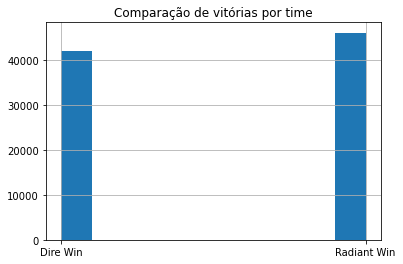

Percentual:


1    0.523252
0    0.476748
Name: radiant_win, dtype: float64

In [18]:
df['radiant_win'].hist()
plt.title('Comparação de vitórias por time')
plt.xticks([0,1],['Dire Win', 'Radiant Win'])
plt.show()

print('Percentual:')
df['radiant_win'].value_counts(normalize=True)

---
## Separar dados para treinamento

In [19]:
colum_names = df.columns

y_column = ['radiant_win']
X_columns = set(colum_names) - set(y_column)

X = df[X_columns]
y = df[y_column[0]].values


**Configurar os folds para a validação cruzada**

In [20]:
n_folds = 5
repeated_cv = 3
cv = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeated_cv, random_state=1)

---
## Treinar modelos de classificação

### Declarando modelos

In [21]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Rede Neural', 'XGBoost', 'Naive Bayes']
scores = [None] * len(model_names)

# Declaring models
Logistic_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors=50)
RdnForest_model = RandomForestClassifier(n_estimators=500)

RNN_model = MLPClassifier(activation='logistic', 
                          hidden_layer_sizes=300,
                          max_iter=800,
                          tol=1e-8,
                          verbose=True)

XGB_model = XGBClassifier(n_estimators=500)
Naive_model = GaussianNB()

models_lst = [Logistic_model, KNN_model, RdnForest_model, RNN_model, XGB_model, Naive_model]

### Treinamento

In [22]:
for i, model in enumerate(models_lst):
    print('---------\nTraining model: ', model_names[i])
    scores[i] = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Model '+model_names[i]+ ' mean score:', round(np.mean(scores[i]),2))

---------
Training model:  Logistic Regression
Model Logistic Regression mean score: 0.55
---------
Training model:  KNN
Model KNN mean score: 0.54
---------
Training model:  Random Forest
Model Random Forest mean score: 0.57
---------
Training model:  Rede Neural
Model Rede Neural mean score: 0.52
---------
Training model:  XGBoost
Model XGBoost mean score: 0.57
---------
Training model:  Naive Bayes
Model Naive Bayes mean score: 0.53


---
## Mostrando e salvando Resultados

### Salvando resultados dos modelos

In [23]:
result_df = pd.DataFrame()
for i, name in enumerate(model_names):
    series_result = pd.DataFrame(scores[i], columns=[name])
    result_df = pd.concat([result_df, series_result], axis=1)
    
display(result_df)
result_df.to_csv(output_savepath+'score_exp06.csv', index=False)

,Logistic Regression,KNN,Random Forest,Rede Neural,XGBoost,Naive Bayes
0,0.565015,0.535540,0.571534,0.52324,0.577656,0.528852
1,0.562408,0.535257,0.568586,0.52324,0.567169,0.527435
2,0.560197,0.541379,0.573234,0.52324,0.567453,0.532479
3,0.562440,0.538688,0.576951,0.52327,0.570319,0.530639
4,0.566691,0.535911,0.578879,0.52327,0.569696,0.531149
5,0.568643,0.538374,0.576409,0.52324,0.567849,0.530552
6,0.523240,0.540698,0.574878,0.52324,0.577656,0.526584
7,0.559574,0.531969,0.570457,0.52324,0.566772,0.528058
8,0.555467,0.533303,0.571396,0.52327,0.571736,0.531886
9,0.562270,0.533530,0.575761,0.52327,0.569639,0.531149


### Gráfico de comparação

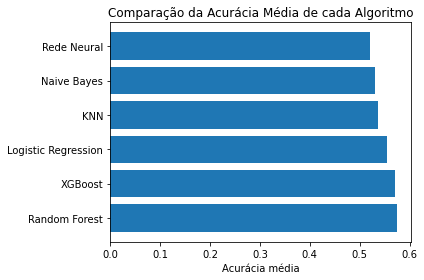

In [24]:
width_plot = result_df.mean().sort_values(ascending=False)

x_plot = width_plot.index.values

plt.barh(y=x_plot, width=width_plot)
plt.title('Comparação da Acurácia Média de cada Algoritmo')
plt.xlabel('Acurácia média')
plt.tight_layout()

plt.savefig(output_savepath+'comparacao_acuracia_modelos_exp06')

---
## Conclusão e próximos passos

A adição de status por herói não contribuiu para a evolução do modelo. O próximo passo será realizar uma sumarização de status por time.